# deep smiles

[05:49:23] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[05:49:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:49:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:49:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:49:25] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:49:25] Explicit valence for atom # 6 N, 4, is greater than permitted


NaN or infinite values detected.
NaN or infinite values detected.


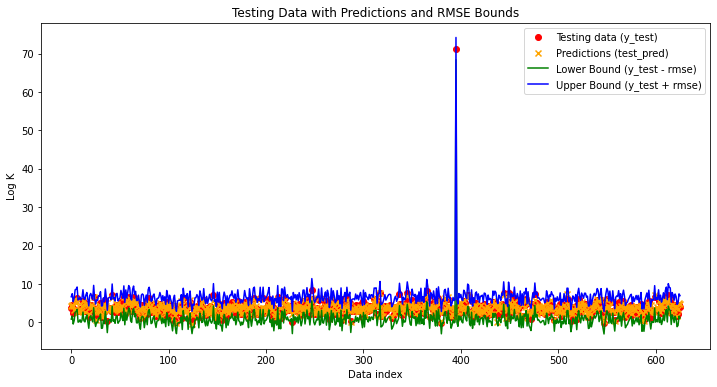

Mean Squared Error: 8.45


In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

def handle_invalid_values(X):
    if np.isnan(X).any() or np.isinf(X).any():
        print("NaN or infinite values detected.")
        X = np.nan_to_num(X)
    return X

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)
data['solvent_features'] = data['solvent1 SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')

# Remove rows with NaN in 'features', 'solvent_features' or 'log K'
data = data.dropna(subset=['features', 'solvent_features', 'log K'])

# Combine features with guest radius and temperature
data['combined_features'] = data.apply(lambda row: np.concatenate((
    [row['guest radius'], row['T']],
    row['features'],
    row['solvent_features']
)), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())
y = data['log K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = handle_invalid_values(X_train)
X_test = handle_invalid_values(X_test)

# Training the model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = DecisionTreeRegressor(random_state=42)
# model = SVR()
model = XGBRegressor()
model.fit(X_train, y_train)

# Predictions
test_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)
rmse = math.sqrt(mse)

y_test = y_test
test_pred = test_pred

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data (y_test)')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions (test_pred)')
lower_bound = y_test - rmse
upper_bound = y_test + rmse
plt.plot(range(len(y_test)), lower_bound, color='green', label='Lower Bound (y_test - rmse)')
plt.plot(range(len(y_test)), upper_bound, color='blue', label='Upper Bound (y_test + rmse)')
plt.title('Testing Data with Predictions and RMSE Bounds')
plt.xlabel('Data index')
plt.ylabel('Log K')
plt.legend()
plt.show()


print("Mean Squared Error: {:.2f}".format(mse))

[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:13:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:13:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:13:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:13:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:13:33] Explicit valence for atom # 6 N, 4, is greater than permitted


NaN or infinite values detected.
NaN or infinite values detected.


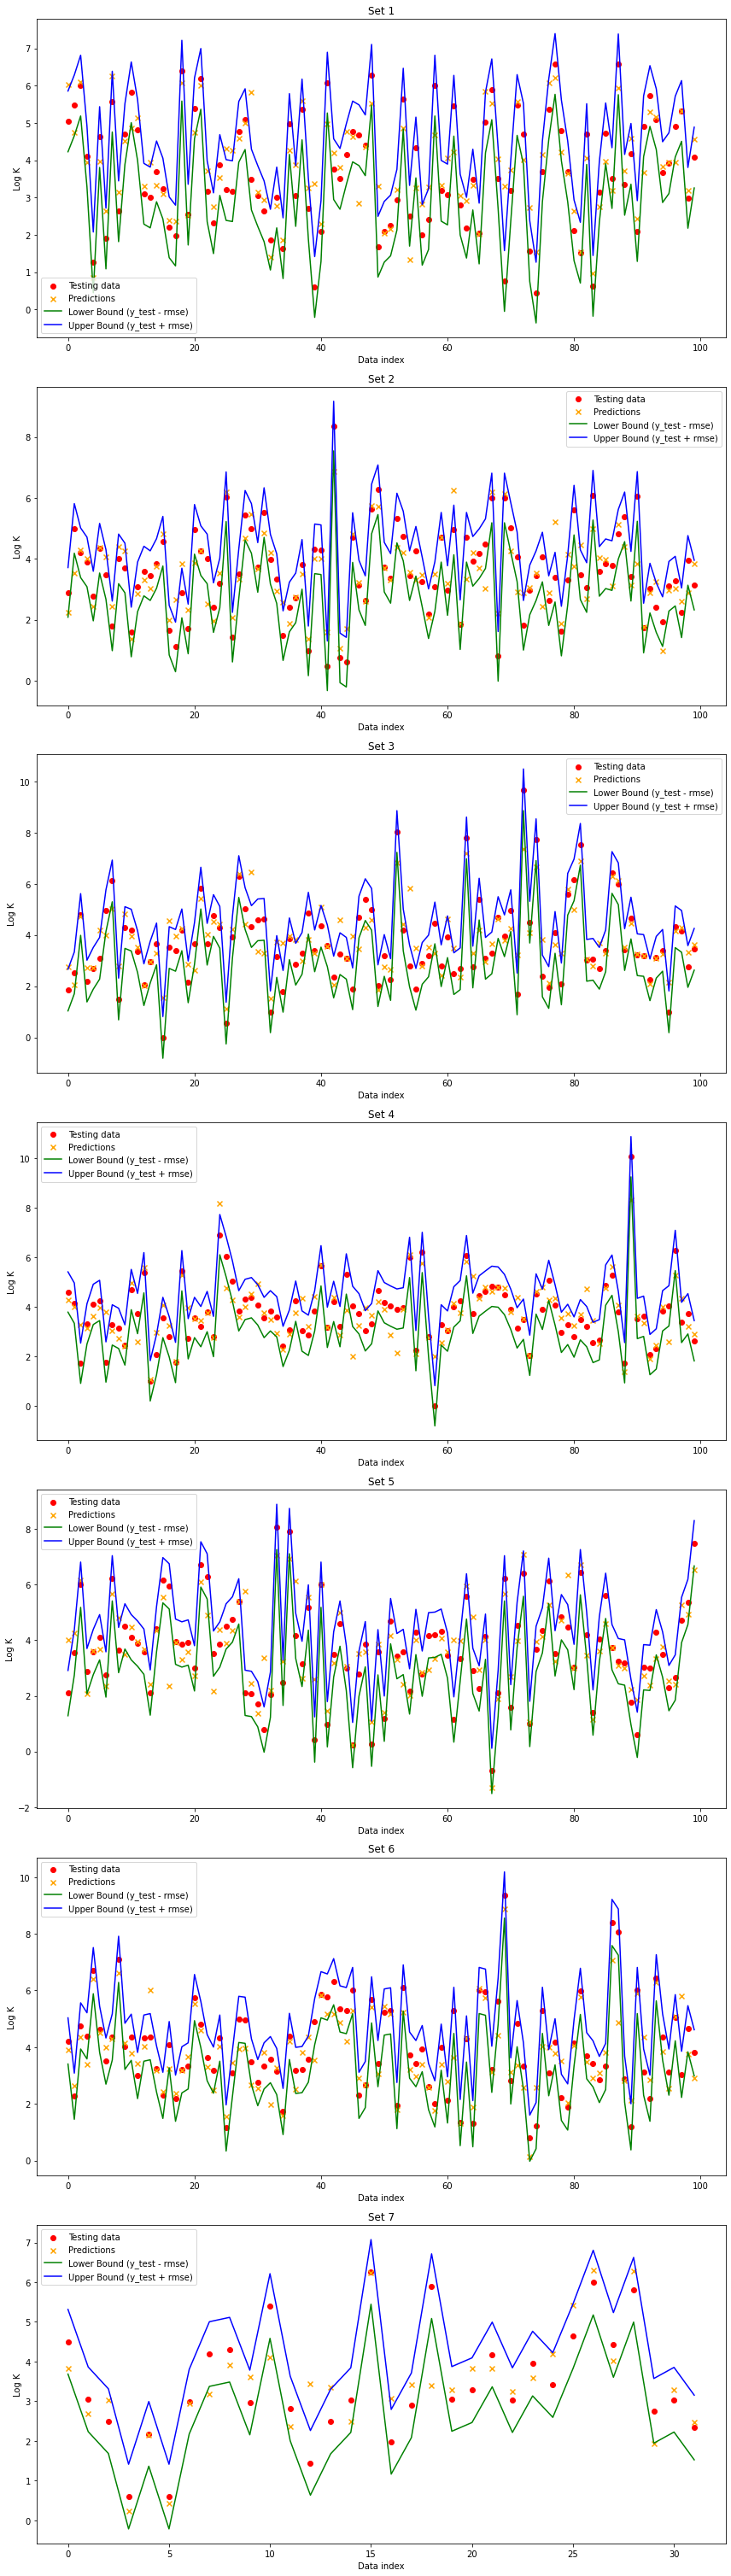

Mean Squared Error: 0.66


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

def handle_invalid_values(X):
    if np.isnan(X).any() or np.isinf(X).any():
        print("NaN or infinite values detected.")
        X = np.nan_to_num(X)
    return X

def divide_chunks(data, chunk_size):
    for i in range(0, len(data), chunk_size):
        yield data[i:i + chunk_size]

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)
data['solvent_features'] = data['solvent1 SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')

# Remove rows with NaN in 'features', 'solvent_features' or 'log K'
data = data.dropna(subset=['features', 'solvent_features', 'log K'])

# Combine features with guest radius and temperature
data['combined_features'] = data.apply(lambda row: np.concatenate((
    [row['guest radius'], row['T']],
    row['features'],
    row['solvent_features']
)), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())
y = data['log K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = handle_invalid_values(X_train)
X_test = handle_invalid_values(X_test)

# Training the model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = DecisionTreeRegressor(random_state=42)
# model = SVR()
model = XGBRegressor()
model.fit(X_train, y_train)

# Predictions
test_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)
rmse = math.sqrt(mse)

# Visualization with subplots
chunk_size = 100
num_chunks = int(np.ceil(len(y_test) / chunk_size))

fig, axs = plt.subplots(num_chunks, 1, figsize=(12, 6 * num_chunks))

for i, (y_chunk, pred_chunk) in enumerate(zip(divide_chunks(y_test, chunk_size), divide_chunks(test_pred, chunk_size))):
    lower_bound = y_chunk - rmse
    upper_bound = y_chunk + rmse
    axs[i].scatter(range(len(y_chunk)), y_chunk, color='red', label='Testing data')
    axs[i].scatter(range(len(y_chunk)), pred_chunk, color='orange', marker='x', label='Predictions')
    axs[i].plot(range(len(y_chunk)), lower_bound, color='green', label='Lower Bound (y_test - rmse)')
    axs[i].plot(range(len(y_chunk)), upper_bound, color='blue', label='Upper Bound (y_test + rmse)')
    axs[i].set_title(f'Set {i+1}')
    axs[i].set_xlabel('Data index')
    axs[i].set_ylabel('Log K')
    axs[i].legend()

plt.tight_layout()
plt.show()

print("Mean Squared Error: {:.2f}".format(mse))

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')  # Convert non-numeric to NaN

# Remove rows with NaN in 'features' or 'log K'
data = data.dropna(subset=['features', 'log K'])

# Combine features with guest radius
data['combined_features'] = data.apply(lambda row: np.concatenate(([row['guest radius']], row['features'])), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())  # Convert to regular list of lists before creating numpy array
y = data['log K'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("x train length: {}".format(len(X_train)))

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Visualization for model performance
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Training data')
plt.scatter(range(len(y_train)), train_pred, color='green', marker='x', label='Predictions on training data')
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions on testing data')
plt.title('Training and Testing Data with Model Predictions')
plt.xlabel('Data Points')
plt.ylabel('Log K')
plt.legend()
plt.show()

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)
print("Mean Squared Error: {:.2f}".format(mse))


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')  # Convert non-numeric to NaN

# Remove rows with NaN in 'features' or 'log K'
data = data.dropna(subset=['features', 'log K'])

# Combine features with guest radius
data['combined_features'] = data.apply(lambda row: np.concatenate(([row['guest radius']], row['features'])), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())  # Convert to regular list of lists before creating numpy array
y = data['log K'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("x train length: {}".format(len(X_train)))

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Visualization for model performance
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Training data')
plt.scatter(range(len(y_train)), train_pred, color='green', marker='x', label='Predictions on training data')
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions on testing data')
plt.title('Training and Testing Data with Model Predictions')
plt.xlabel('Data Points')
plt.ylabel('Log K')
plt.legend()
plt.show()

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)
print("Mean Squared Error: {:.2f}".format(mse))


[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:17] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:29:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:29:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:29:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:29:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:29:18] Explicit valence for atom # 6 N, 4, is greater than permitted


NaN or infinite values detected.
NaN or infinite values detected.


/var/folders/s_/fdf2zdk90lnfq7q45jb_ndpm0000gp/T/ipykernel_67720/2643566933.py:73: RuntimeWarning: divide by zero encountered in divide
  accuracy = 100 * (1 - np.abs(y_test - test_pred) / y_test)


Filtered results saved to /Users/Felix/Documents/lab/化学实验/high_low_accuracy_predictions_XGBoost.xlsx


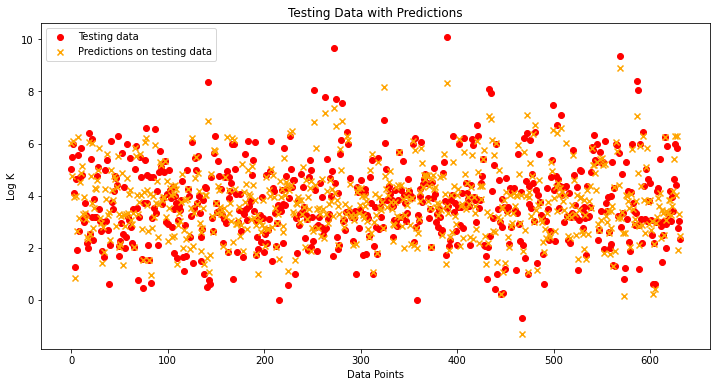

Mean Squared Error: 0.66


In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

def handle_invalid_values(X):
    if np.isnan(X).any() or np.isinf(X).any():
        print("NaN or infinite values detected.")
        X = np.nan_to_num(X)
    return X

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)
data['solvent_features'] = data['solvent1 SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')

# Remove rows with NaN in 'features', 'solvent_features' or 'log K'
data = data.dropna(subset=['features', 'solvent_features', 'log K'])

# Combine features with guest radius and temperature
data['combined_features'] = data.apply(lambda row: np.concatenate((
    [row['guest radius'], row['T']],
    row['features'],
    row['solvent_features']
)), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())
y = data['log K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = handle_invalid_values(X_train)
X_test = handle_invalid_values(X_test)

# Training the model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = XGBRegressor()
model.fit(X_train, y_train)

# Predictions
test_pred = model.predict(X_test)

# Calculate the accuracy for each prediction
accuracy = 100 * (1 - np.abs(y_test - test_pred) / y_test)

# Create a DataFrame with test data, predictions, and accuracy
results_df = pd.DataFrame({
    'Guest Radius': X_test[:, 0],  # Assuming the first feature is the guest radius
    'Temperature': X_test[:, 1],  # Assuming the second feature is the temperature
    'Actual Log K': y_test,
    'Predicted Log K': test_pred,
    'Accuracy (%)': accuracy
})

# Filter predictions with accuracy > 95% or < 10%
filtered_results = results_df[(results_df['Accuracy (%)'] > 95) | (results_df['Accuracy (%)'] < 10)]

# Save the filtered results to a new Excel file
output_file_path = '/Users/Felix/Documents/lab/化学实验/high_low_accuracy_predictions_XGBoost.xlsx'
filtered_results.to_excel(output_file_path, index=False)

print(f"Filtered results saved to {output_file_path}")

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions on testing data')
plt.title('Testing Data with Predictions')
plt.xlabel('Data Points')
plt.ylabel('Log K')
plt.legend()
plt.show()

print("Mean Squared Error: {:.2f}".format(mse))


[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[08:55:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:55:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:55:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:55:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[08:55:18] Explicit valence for atom # 6 N, 4, is greater than permitted


NaN or infinite values detected.
NaN or infinite values detected.


/var/folders/s_/fdf2zdk90lnfq7q45jb_ndpm0000gp/T/ipykernel_70713/2367738124.py:68: RuntimeWarning: divide by zero encountered in divide
  accuracy = 100 * (1 - np.abs(y_test - test_pred) / y_test)


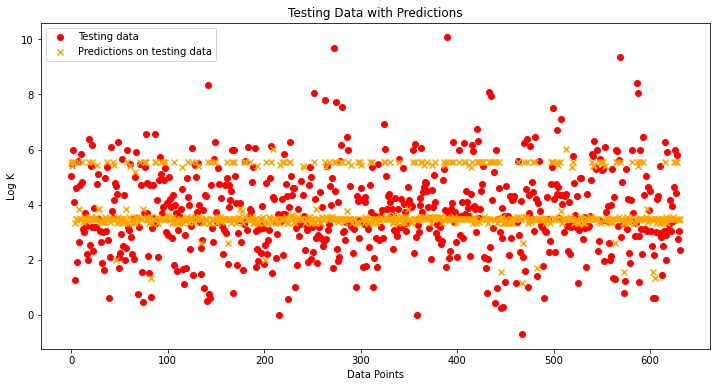

Mean Squared Error: 1.55
Number of predictions with accuracy > 95%: 71
Number of predictions with accuracy < 10%: 60


In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

def handle_invalid_values(X):
    if np.isnan(X).any() or np.isinf(X).any():
        print("NaN or infinite values detected.")
        X = np.nan_to_num(X)
    return X

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114.xlsx'
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)
data['solvent_features'] = data['solvent1 SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')

# Remove rows with NaN in 'features', 'solvent_features' or 'log K'
data = data.dropna(subset=['features', 'solvent_features', 'log K'])

# Combine features with guest radius and temperature
data['combined_features'] = data.apply(lambda row: np.concatenate((
    [row['guest radius'], row['T']],
    row['features'],
    row['solvent_features']
)), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())
y = data['log K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = handle_invalid_values(X_train)
X_test = handle_invalid_values(X_test)

# Training the model using AdaBoost
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Predictions
test_pred = model.predict(X_test)

# Calculate the accuracy for each prediction
accuracy = 100 * (1 - np.abs(y_test - test_pred) / y_test)
high_accuracy_count = np.sum(accuracy > 95)
low_accuracy_count = np.sum(accuracy < 10)

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions on testing data')
plt.title('Testing Data with Predictions')
plt.xlabel('Data Points')
plt.ylabel('Log K')
plt.legend()
plt.show()

print("Mean Squared Error: {:.2f}".format(mse))
print(f"Number of predictions with accuracy > 95%: {high_accuracy_count}")
print(f"Number of predictions with accuracy < 10%: {low_accuracy_count}")


In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def extract_features(deep_smiles):
    try:
        mol = Chem.MolFromSmiles(deep_smiles)
        if mol is None:
            return np.nan
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        morgan_fp_array = np.array(morgan_fp)
        return np.array([mw, logp, tpsa, *morgan_fp_array])
    except:
        return np.nan

def handle_invalid_values(X):
    if np.isnan(X).any() or np.isinf(X).any():
        print("NaN or infinite values detected.")
        X = np.nan_to_num(X)
    return X

# Load your dataset
file_path = '/Users/Felix/Documents/lab/化学实验/IA-1114_fingerprints.xlsx'
data = pd.read_excel(file_path)

# Feature extraction
data['features'] = data['Host SMILES'].apply(extract_features)
data['solvent_features'] = data['solvent1 SMILES'].apply(extract_features)

# Clean the 'log K' column
data['log K'] = pd.to_numeric(data['log K'], errors='coerce')

# Remove rows with NaN in 'features', 'solvent_features' or 'log K'
data = data.dropna(subset=['features', 'solvent_features', 'log K'])

# Combine features with guest radius and temperature
data['combined_features'] = data.apply(lambda row: np.concatenate((
    [row['guest radius'], row['T']],
    row['features'],
    row['solvent_features']
)), axis=1)

# Splitting the data
X = np.array(data['combined_features'].tolist())
y = data['log K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = handle_invalid_values(X_train)
X_test = handle_invalid_values(X_test)

# Training the model using AdaBoost
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Predictions
test_pred = model.predict(X_test)

# Calculate the accuracy for each prediction
accuracy = 100 * (1 - np.abs(y_test - test_pred) / y_test)
high_accuracy_count = np.sum(accuracy > 95)
low_accuracy_count = np.sum(accuracy < 10)

# Mean Squared Error
mse = mean_squared_error(y_test, test_pred)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Testing data')
plt.scatter(range(len(y_test)), test_pred, color='orange', marker='x', label='Predictions on testing data')
plt.title('Testing Data with Predictions')
plt.xlabel('Data Points')
plt.ylabel('Log K')
plt.legend()
plt.show()

print("Mean Squared Error: {:.2f}".format(mse))
print(f"Number of predictions with accuracy > 95%: {high_accuracy_count}")
print(f"Number of predictions with accuracy < 10%: {low_accuracy_count}")


[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Error: syntax error while parsing: [0,
[06:31:38] SMILES Parse Error: Failed parsing SMILES '[0,' for input: '[0,'
[06:31:38] SMILES Parse Err

ValueError: Expected a 1D array, got an array with shape (0, 25)